In [34]:
#First, let's download the "Dogs vs. Cats" dataset from Kaggle, which contains 25,000 images and use a subset of the full dataset to decrease training time.
#IMPORTANT!!! before downloading the dataset, create a new folder 
#(in colab) in home directory named "final_home"

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /home/final_home/cats_and_dogs_filtered.zip

--2020-02-09 01:47:04--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/home/final_home/cats_and_dogs_filtered.zip’

/home/final_home/ca 100%[===================>]  65.43M   197MB/s    in 0.3s    

2020-02-09 01:47:05 (197 MB/s) - ‘/home/final_home/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



## Image Classification Model - Cats🐱 vs Dogs🐶 
By Kadar Amek, Joseph Filla, Will Wright.





In [0]:
#extract.zip file contains train and validation data

import os
import zipfile

local_zip = '/home/final_home/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/home/final_home')
zip_ref.close()

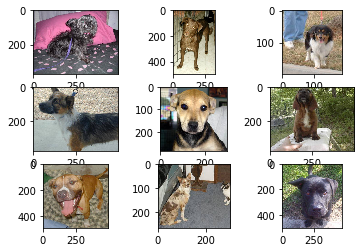

In [3]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '/home/final_home/cats_and_dogs_filtered/train/dogs/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

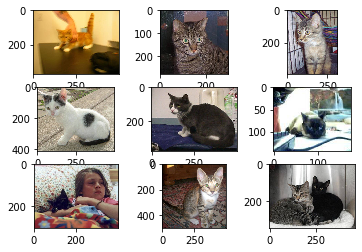

In [4]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '/home/final_home/cats_and_dogs_filtered/train/cats/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'cat.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [5]:
#Keras is an Open Source Neural Network library 
#written in Python that runs on top of Theano or Tensorflow
import keras
#image augmentation artifically expand the size of training dataset by creating
#motivate version of images
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.applications.mobilenet import MobileNet
import math

Using TensorFlow backend.


In [0]:
TRAIN_DATA_DIR = '/home/final_home/cats_and_dogs_filtered/train/'
VALIDATION_DATA_DIR = '/home/final_home/cats_and_dogs_filtered/validation/'
TRAIN_SAMPLES = 2000
VALIDATION_SAMPLES = 100
NUM_CLASSES=2
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE=64

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
                        TRAIN_DATA_DIR,
                        target_size=(IMG_WIDTH, IMG_HEIGHT),
                        batch_size=BATCH_SIZE,
                        shuffle=True,
                        seed=12345,
                        class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(
                        VALIDATION_DATA_DIR,
                        target_size=(IMG_WIDTH, IMG_HEIGHT),
                        batch_size=BATCH_SIZE,
                        shuffle=False,
                        class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
def model_maker():
    base_model = MobileNet(include_top=False, input_shape = (IMG_WIDTH,IMG_HEIGHT,3))
    for layer in base_model.layers[:]:
        layer.trainable = False # Freeze the layers
    input = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    custom_model = base_model(input)
    custom_model = GlobalAveragePooling2D()(custom_model)
    custom_model = Dense(64, activation='relu')(custom_model)
    custom_model = Dropout(0.5)(custom_model)
    predictions = Dense(NUM_CLASSES, activation='softmax')(custom_model)
    return Model(inputs=input, outputs=predictions)

In [10]:
model = model_maker()
model.compile(loss='categorical_crossentropy',
              optimizer= keras.optimizers.Adam(lr=0.001),
              metrics=['acc'])
model.fit_generator(train_generator,
                    steps_per_epoch = math.ceil(float(TRAIN_SAMPLES) / BATCH_SIZE),
                    epochs=10,
                    validation_data = validation_generator,
                    validation_steps = math.ceil(float(VALIDATION_SAMPLES) / BATCH_SIZE))












17227776/17225924 [==============================] - 0s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
32/32 [==============================] - 28s 890ms/step - loss: 0.4531 - acc: 0.8006 - val_loss: 0.0206 - val_acc: 1.0000
Epoch 2/10
32/32 [==============================] - 23s 732ms/step - loss: 0.1733 - acc: 0.9355 - val_loss: 0.0105 - val_acc: 1.0000
Epoch 3/10
32/32 [==============================] - 24s 758ms/step - loss: 0.1638 - acc: 0.9380 - val_loss: 0.0061 - val_acc: 1.0000
Epoch 4/10
32/32 [==============================] - 24s 735ms/step - loss: 0.1208 - acc: 0.9536 - val_loss: 0.0249 - val_acc: 0.9844
Epoch 5/10
32/32 [==============================] - 24s 739ms/step - loss: 0.0978 - acc: 0.9634 - val_loss: 0.1437 - val_acc: 0.9453
Epoch 6/10
32/32 [============================

In [0]:
model.save('/home/final_home/model.h5')

In [0]:
from keras.models import load_model
model = load_model('/home/final_home/model.h5')

In [15]:
import numpy as np

img_path = '/home/final_home/cats_and_dogs_filtered/validation/dogs/dog.2000.jpg'
img = keras.preprocessing.image.load_img(img_path, target_size=(224,224))
img_array = keras.preprocessing.image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = expanded_img_array / 255. # Preprocess the image
prediction = model.predict(preprocessed_img)
print(prediction)
print(validation_generator.class_indices)
[[0.9967706]]
{'dog': 1, 'cat': 0}

[[0.00890061 0.9910994 ]]
{'cats': 0, 'dogs': 1}


{'cat': 0, 'dog': 1}

In [16]:
#####################
##### VARIABLES #####
#####################

IMG_WIDTH, IMG_HEIGHT = 224, 224
VALIDATION_DATA_DIR = '/home/final_home/cats_and_dogs_filtered/validation/'
VALIDATION_BATCH_SIZE = 64

#####################
## DATA GENERATORS ##
#####################

validation_datagen = ImageDataGenerator(
        rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DATA_DIR,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=VALIDATION_BATCH_SIZE,
        shuffle=False,
        class_mode='categorical')

ground_truth = validation_generator.classes

Found 1000 images belonging to 2 classes.


In [0]:
predictions = model.predict_generator(validation_generator, steps=(1000/VALIDATION_BATCH_SIZE))


In [0]:
# prediction_table is a dict with index, prediction, ground truth
prediction_table = {}
for index, val in enumerate(predictions):
    #get argmax index
    index_of_highest_probability = np.argmax(val)
    value_of_highest_probability = val[index_of_highest_probability]
    prediction_table[index] = [value_of_highest_probability, index_of_highest_probability,
    ground_truth[index]]
assert len(predictions) == len(ground_truth) == len(prediction_table)

In [0]:
# Helper function that finds images that are closest
# Input parameters:
#   prediction_table: dictionary from the image index to the prediction
#                      and ground truth for that image
#   get_highest_probability: boolean flag to indicate if the results
#                            need to be highest (True) or lowest (False) probabilities
#   label: id of category
#   number_of_items: num of results to return
#   only_false_predictions: boolean flag to indicate if results
#                           should only contain incorrect predictions
def get_images_with_sorted_probabilities(prediction_table, get_highest_probability,
 label, number_of_items, only_false_predictions=False):
    sorted_prediction_table = [ (k, prediction_table[k]) for k in sorted(prediction_table, key=prediction_table.get, reverse= get_highest_probability)]
    result = []
    for index, key in enumerate(sorted_prediction_table):
        image_index, [probability, predicted_index, gt] = key
        
        if predicted_index == label:
            if only_false_predictions == True:
                if predicted_index != gt:
                    result.append([image_index, [probability, predicted_index, gt] ])
            else:
                result.append([image_index, [probability, predicted_index, gt] ])
        if len(result) >= number_of_items:
            return result

In [0]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Helper functions to plot the nearest images given a query image
def plot_images(filenames, distances, message):
    images = []
    for filename in filenames:
        images.append(mpimg.imread(filename))
    plt.figure(figsize=(20,15))
    columns = 5
    for i, image in enumerate(images):
        ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
        ax.set_title( "\n\n"+  filenames[i].split("/")[-1]+"\n"+"\nProbability: " +
        str(float("{0:.2f}".format(distances[i]))))
        plt.suptitle( message, fontsize=20, fontweight='bold')
        plt.axis('off')
        plt.imshow(image)


def display(sorted_indicies, message, fnames):
    similar_image_paths = []
    distances = []
    for name, value in sorted_indicies:
        [probability, predicted_index, gt] = value
        similar_image_paths.append(VALIDATION_DATA_DIR + fnames[name])
        distances.append(probability)
    plot_images(similar_image_paths,distances, message)

Which images are we most confident contain dogs? Let’s find images with the highest prediction probability (i.e. closest to 1.0) with the predicted class dog (i.e. 1).

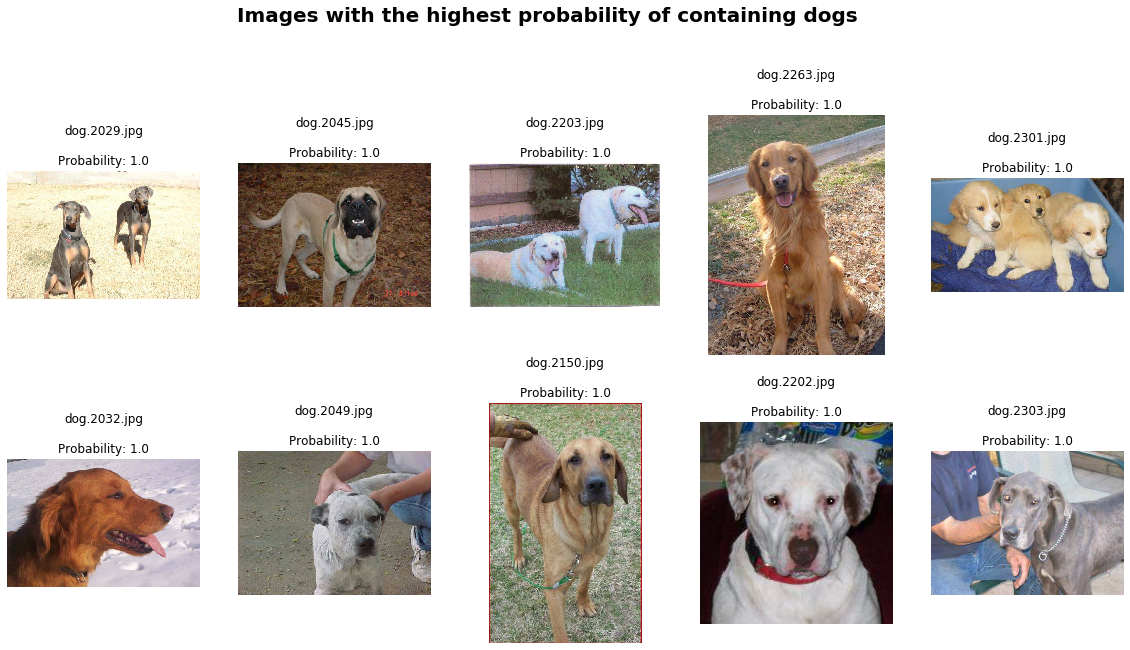

In [24]:
# Most confident predictions of 'dog'
indices = get_images_with_sorted_probabilities(prediction_table, True, 1, 10, False)
message = 'Images with the highest probability of containing dogs'
display(indices[:10], message, validation_generator.filenames)

Above images are indeed very dog-looking-like. One of the reasons why the probability is so high can be attributed to containing multiple dogs, as well as clear, obvious views. Now let’s try to find which images are we least confident of containing dogs?

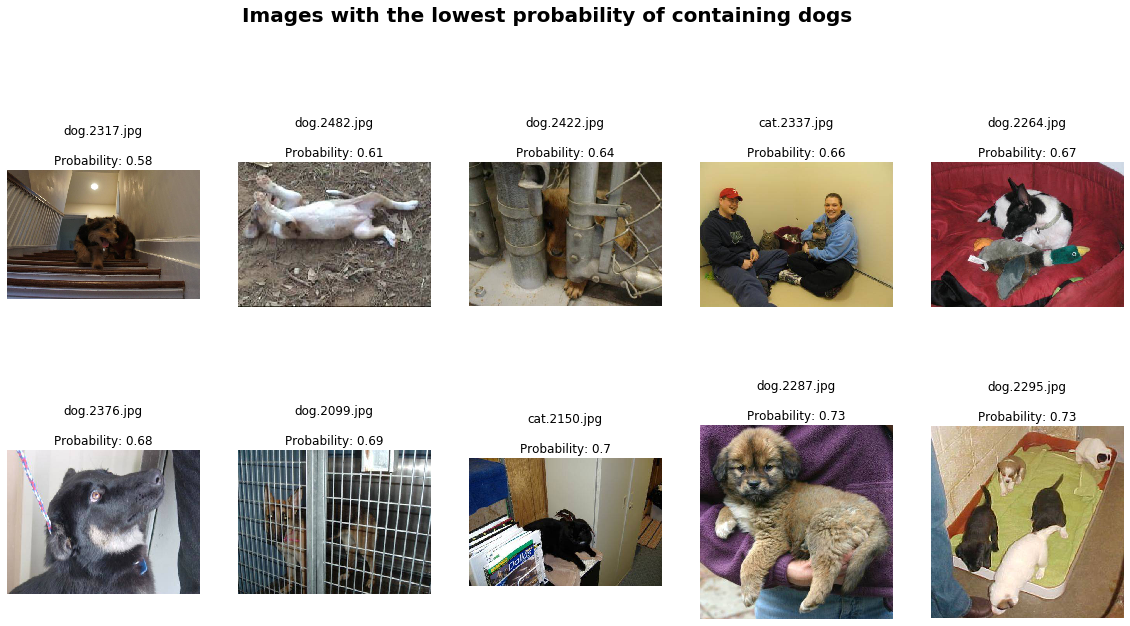

In [25]:
# Least confident predictions of 'dog'
indices = get_images_with_sorted_probabilities(prediction_table, False, 1, 10, False)
message = 'Images with the lowest probability of containing dogs'
display(indices[:10], message, validation_generator.filenames)

Above images, our classifier is most unsure of either dog or not. Most of the predictions are near 0.5 probability so porpability of being cat is just slightly smaller, near and less 0.49. Compared to the previous set of images, the above images often contain humans or less clear images.


Repeating the same set of question for the cat class, which images are more cat-like?

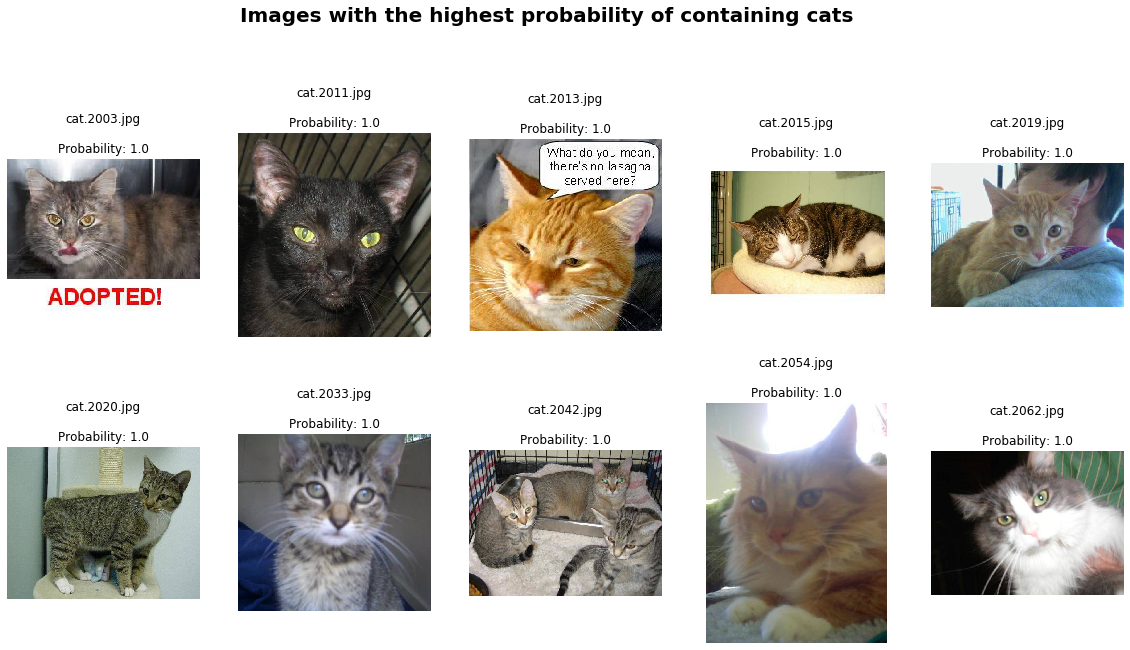

In [29]:
# Most confident predictions of 'cat'
indices = get_images_with_sorted_probabilities(prediction_table, True, 0, 10, False)
message = 'Images with the highest probability of containing cats'
display(indices[:10], message, validation_generator.filenames)

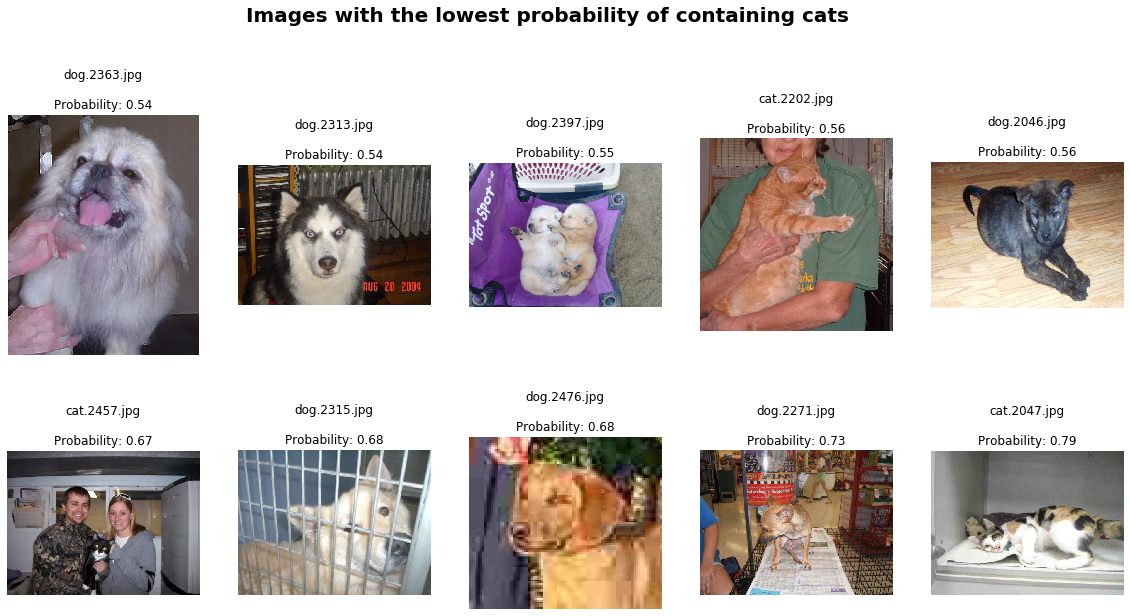

In [30]:
# Least confident predictions of 'cat'
indices = get_images_with_sorted_probabilities(prediction_table, False, 0, 10, False)
message = 'Images with the lowest probability of containing cats'
display(indices[:10], message, validation_generator.filenames)